In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin-1')

In [5]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
dataset = dataset.drop(columns=dataset.iloc[:, [2, 3, 4]])

In [8]:
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
dataset = dataset.rename(columns= {'v1': 'class', 'v2': 'mail'})

In [10]:
dataset.head()

,class,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
dataset.duplicated().any()

True

In [22]:
dataset = dataset.drop_duplicates()

In [24]:
dataset.shape

(5169, 2)

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   5169 non-null   object
 1   mail    5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [28]:
dataset.isnull().sum()

class    0
mail     0
dtype: int64

In [38]:
dataset.describe()

,class,mail
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [29]:
class_count= dataset['class'].value_counts()

<Axes: xlabel='class', ylabel='count'>

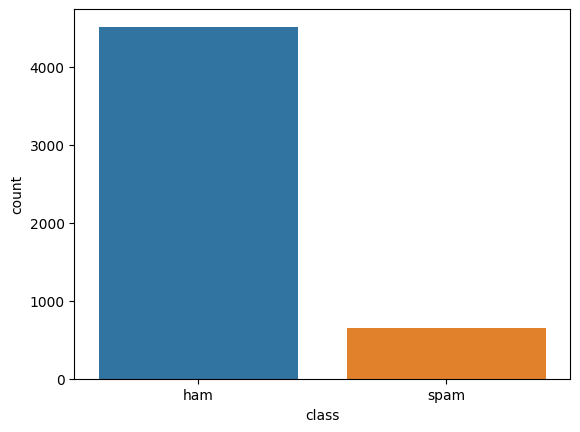

In [30]:
sns.barplot(x = class_count.index, y = class_count)

In [31]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [37]:
corpus =[]

for i in range(0, len(dataset)):
  # '[^a-zA-Z]' means leave all letter form a to z or A to Z and replace any thing else with a space [' ']
  mail = re.sub('[^a-zA-Z]', ' ',dataset.iloc[i]['mail'])
  # Lower the letter
  mail = mail.lower()
  #tokinizing or splitting words
  mail = mail.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  # apply stemming on the mails except stop words
  mail = [ps.stem(word) for word in mail if not word in set(all_stopwords)]
  # joining the mails thogether again with space between them [' '].
  mail = ' '.join(mail)
  # add the cleaned reviews into the corpus list
  corpus.append(mail)


In [ ]:
#print(stopwords.words('english'))

In [48]:
corpus[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=6221)
X = tf.fit_transform(corpus).toarray()

In [51]:
print(len(X[0]))

6221


In [58]:
y = dataset.iloc[:, 0]

In [59]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: class, Length: 5169, dtype: object

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#y=data.iloc[:,0]
#x=data.iloc[:,1]
#y = y.map({'spam': 1, 'ham': 0})

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [63]:
y_pred = lr.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('f1_score:', f1_score(y_test, y_pred))
print('recall_score:', recall_score(y_test, y_pred))

[[883   2]
 [ 44 105]]
accuracy: 0.9555125725338491
precision: 0.9813084112149533
f1_score: 0.8203124999999999
recall_score: 0.7046979865771812


Text(50.722222222222214, 0.5, 'Actual')

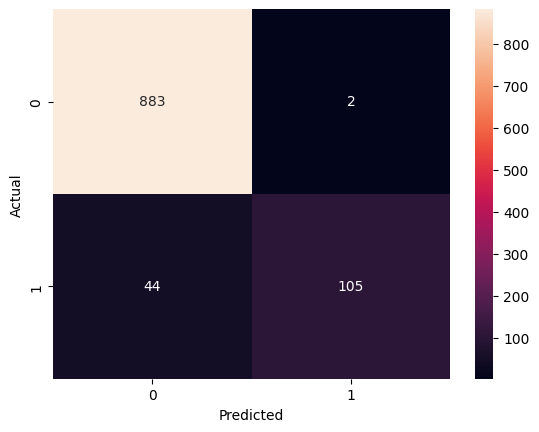

In [73]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [69]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [70]:
y_predsvc = svc.predict(X_test)

In [71]:
cm_svc = confusion_matrix(y_test, y_predsvc)
print(cm_svc)
print('accuracy:', accuracy_score(y_test, y_predsvc))
print('precision:', precision_score(y_test, y_predsvc))
print('f1_score:', f1_score(y_test, y_predsvc))
print('recall_score:', recall_score(y_test, y_predsvc))

[[882   3]
 [ 23 126]]
accuracy: 0.9748549323017408
precision: 0.9767441860465116
f1_score: 0.9064748201438849
recall_score: 0.8456375838926175


Text(50.722222222222214, 0.5, 'Actual')

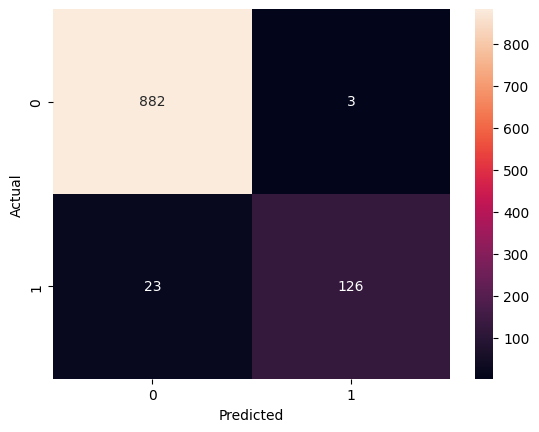

In [74]:
sns.heatmap(cm_svc, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [95]:
test_mail = svc.predict(tf.transform(['This is the 2nd time we have tried 2 contact u. U have won the آ£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.']).toarray())

In [99]:
if test_mail == 1:
    print('spam')
else:
    print('ham')

spam
